In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import keras
import keras.backend as K
from tqdm import tqdm
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau, TensorBoard
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
import cv2
import shutil
import innvestigate
import innvestigate.utils as iutils
import innvestigate.utils.visualizations as ivis

import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)
print(keras.__version__)

/datasets/home/97/297/saqian/.local_backups/python3_2020-10-27_162041/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/datasets/home/97/297/saqian/.local_backups/python3_2020-10-27_162041/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/datasets/home/97/297/saqian/.local_backups/python3_2020-10-27_162041/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,

1.14.0
2.2.4


In [2]:
model = load_model("../models/weights/model.h5")








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [39]:
explainer = lime_image.LimeImageExplainer()

In [46]:
img = cv2.imread("../data/nejmoa2001191_f5-PA.jpeg")
img = cv2.resize(img, (150, 150))

In [47]:
img = img.astype("float")
a, b = img.min(), img.max()
c, d = 0, 1

def preprocessing(X):
    # shift original data to [0, b-a] (and copy)
    X = X - a
    # scale to new range gap [0, d-c]
    X /= (b-a)
    X *= (d-c)
    # shift to desired output range
    X += c
    return X

img = preprocessing(img)

In [49]:
explanation = explainer.explain_instance(img, 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=1000)

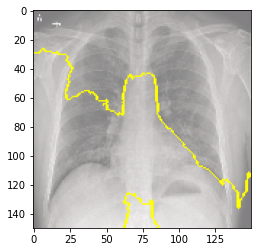

In [52]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True, 
                                            num_features=5, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))